In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('2021to2023.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,01-JAN-2021,13996.10,14049.85,13991.35,14018.50,258090905,15873.75
1,04-JAN-2021,14104.35,14147.95,13953.75,14132.90,494999295,28705.09
2,05-JAN-2021,14075.15,14215.60,14048.15,14199.50,492475349,30872.87
3,06-JAN-2021,14240.95,14244.15,14039.90,14146.25,632323316,34615.55
4,07-JAN-2021,14253.75,14256.25,14123.10,14137.35,559173512,33446.47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6678 entries, 0 to 6677
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             6678 non-null   object 
 1   Open             6678 non-null   float64
 2   High             6678 non-null   float64
 3   Low              6678 non-null   float64
 4   Close            6678 non-null   float64
 5   Shares Traded    6678 non-null   int64  
 6   Turnover (₹ Cr)  6678 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 365.3+ KB


In [5]:
df = df.drop('Date ',axis=1)

In [6]:
df['Close'] = df['Close '] 

In [7]:
from sklearn.ensemble import RandomForestRegressor

In [8]:
model = RandomForestRegressor(n_estimators=10000,random_state=32)

In [9]:
X = df.drop(['Close'],axis=1)

In [10]:
y = df['Close']

In [11]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [12]:
y_train.head()

2768    17674.95
125     15818.25
5419    17166.90
4455    14146.25
6596    17094.35
Name: Close, dtype: float64

In [13]:
model.fit(X_train,y_train)

In [ ]:
X_train

,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
2768,17740.90,17779.05,17650.95,17674.95,251701846,21001.58
125,15813.75,15914.20,15801.00,15818.25,391410742,24456.05
5419,17104.40,17213.05,17064.25,17166.90,295542125,24098.73
4455,14240.95,14244.15,14039.90,14146.25,632323316,34615.55
6596,16798.05,17187.10,16747.70,17094.35,380204763,26205.63
...,...,...,...,...,...,...
3915,17783.15,17954.10,17697.10,17929.65,281190130,24354.38
1428,18044.35,18103.10,17969.40,18028.20,256451785,19848.06
6537,15818.20,16011.35,15800.90,15989.80,288375300,22836.77
4367,17110.90,17176.45,16942.35,17007.40,359895458,22712.80


In [ ]:
input = df.iloc[0]
input = np.array(input)
input = np.delete(input,3)
input = input.reshape(1,-1)

In [ ]:
model.predict(input)

c:\Users\gunja\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([19977.697465])

In [ ]:
y_pred = model.predict(X_test)

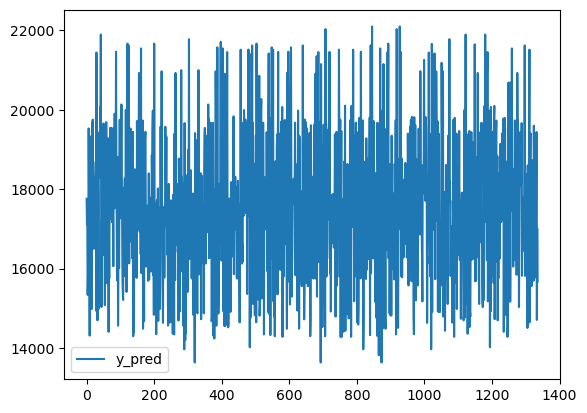

In [ ]:
plt.plot(y_pred)
plt.legend(['y_pred'])

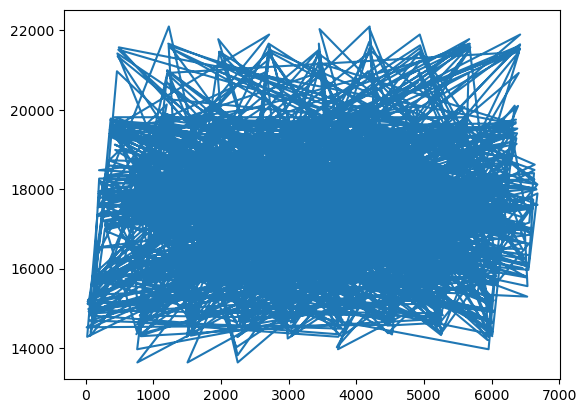

In [ ]:
plt.plot(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mse = mean_squared_error(y_test, y_pred).mean()
print(mse)

0.007148393653020528


In [ ]:
y_pred

array([17758.44931 , 17107.475235, 17151.909555, ..., 14707.79887 ,
       17014.350915, 15670.258775])

In [ ]:
y_test = np.array(y_test)

In [ ]:
r2 = r2_score(y_test,y_pred)
print(r2)

0.9999999976366045
